# 8 图像频域滤波

根据卷积定理, 在原图上用卷积等价于在频域上相乘. 所以原图上的卷积核可以等价到频域上的相乘的核.

$$\widehat{F*G} = \hat F \odot \hat G$$

## 低通滤波器

在频域上保留低频的 (接近原点的), 滤掉高频的 (远离原点的). 例如在频域上将图像乘上如下的高斯滤波器:

$$e^{-\frac{|z|^2}{2\sigma^2}}=e^{-\frac{x^2+y^2}{2\sigma^2}}$$

则远离原点的部分会变得极小, 即高频部分被滤掉.

高斯滤波器因为是高斯卷积核的傅里叶变换, 所以有平滑的作用.

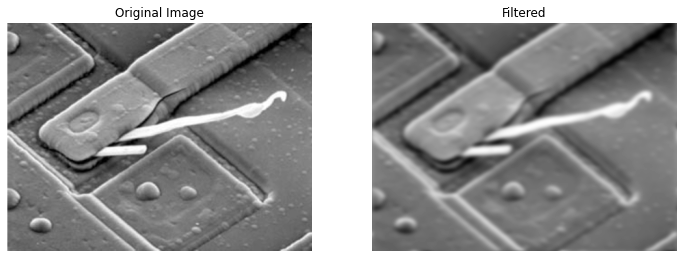

In [30]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import os
img = np.array(Image.open(os.path.join(os.getcwd(), 'pics\\gadget.png')).convert('L'))
img_fft = np.fft.fftshift(np.fft.fft2(img))

coor = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0]))
coor = (coor[0] - coor[0].mean(), coor[1] - coor[1].mean())
gauss_filter = np.exp(-(coor[0]**2+coor[1]**2) / 1000)

img_filtered = img_fft * gauss_filter

img_filtered = np.fft.ifft2(np.fft.ifftshift(img_filtered)).real

plt.figure(figsize = (12, 5))
plt.subplot(1,2,1)
plt.imshow(img, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img_filtered, cmap = 'gray')
plt.title('Filtered')
plt.axis('off')
plt.show()

## 高通滤波器

在频域上保留高频的 (远离原点的), 滤掉低频的 (接近原点的). 可以用 ${\rm 高通滤波器} =  1 - {\rm 低通滤波器}$ 得到.

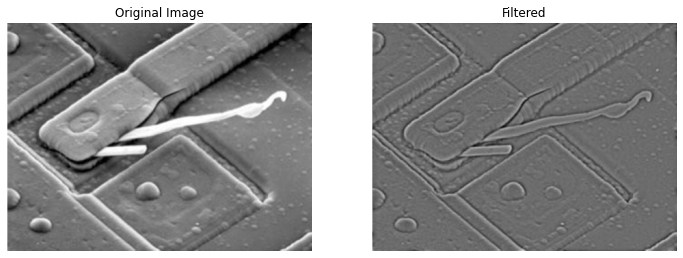

In [31]:
import os
from matplotlib import pyplot as plt
from PIL import Image 
import numpy as np 
img = np.array(Image.open(os.path.join(os.getcwd(), 'pics\\gadget.png')).convert('L'))
img_fft = np.fft.fftshift(np.fft.fft2(img))

coor = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0]))
coor = (coor[0] - coor[0].mean(), coor[1] - coor[1].mean())
# note that high_pass = (1 - low_pass)
gauss_filter = 1. - np.exp(-(coor[0]**2+coor[1]**2) / 1000)

img_filtered = img_fft * gauss_filter

img_filtered = np.fft.ifft2(np.fft.ifftshift(img_filtered)).real

plt.figure(figsize = (12, 5))
plt.subplot(1,2,1)
plt.imshow(img, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img_filtered, cmap = 'gray')
plt.title('Filtered')
plt.axis('off')
plt.show()

## 锐化滤波器

将原图上的拉普拉斯或 Highboost 锐化方法用傅里叶变换转到频率域中. Laplacian 卷积核对应的频域核是

$$L(x,y)=-4\pi^2\left(\frac{x^2}{M^2}+\frac{y^2}{N^2}\right)$$

(M,N 为图像大小).

证: 回忆离散逆傅里叶变换: 
$$f(u,v) = \frac{1}{MN}\sum_{x=0}^{M-1}\sum_{y=0}^{N-1} \hat f(x,y)e^{2\pi it(ux/M+vy/N)}$$

所以

$$\Delta f(u,v) = \frac{\partial ^2f}{\partial ^2u}+\frac{\partial ^2f}{\partial ^2v}
= \frac{1}{MN}\sum_{x=0}^{M-1}\sum_{y=0}^{N-1} \hat f(x,y)
\left(\frac{-4\pi^2 x^2}{M^2}+\frac{-4\pi^2 y^2}{N^2}\right)e^{2\pi it(ux/M+vy/N)}$$

恰恰相当于 $\hat f(x,y)\odot L(x,y)$ 的傅里叶逆变换.

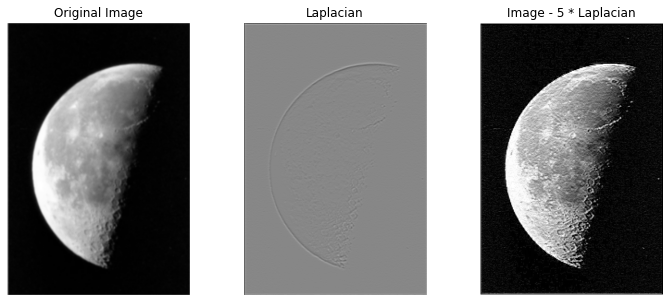

In [32]:
import os
from matplotlib import pyplot as plt
from PIL import Image 
import numpy as np 
img = np.array(Image.open(os.path.join(os.getcwd(), 'pics\\moon.png')).convert('L'))
img_fft = np.fft.fftshift(np.fft.fft2(img))

coor = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0]))
coor = (coor[0] - coor[0].mean(), coor[1] - coor[1].mean())
laplacian_filter = - 4 * np.pi**2 * ((coor[0] / img.shape[0])**2 + (coor[1] / img.shape[1])**2)

img_edge = img_fft * laplacian_filter

img_edge = np.fft.ifft2(np.fft.ifftshift(img_edge)).real

# To sharpen the image, we should substract the Laplacian from the original image
img_sharpened = (img - 5 * img_edge).clip(0, 255)

plt.figure(figsize = (12, 5))
plt.subplot(1,3,1)
plt.imshow(img, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(img_edge, cmap = 'gray')
plt.title('Laplacian')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(img_sharpened, cmap = 'gray')
plt.title('Image - 5 * Laplacian')
plt.axis('off')
plt.show()

## 选择滤波器

更多内容请看下一节.

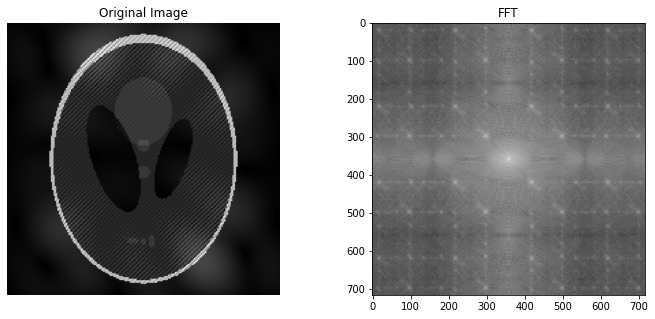

In [33]:
import os
from matplotlib import pyplot as plt
from PIL import Image 
import numpy as np 
img = np.array(Image.open(os.path.join(os.getcwd(), 'pics\\CT.png')).convert('L'))
img_fft = np.fft.fftshift(np.fft.fft2(img))

plt.figure(figsize = (12, 5))
plt.subplot(1,2,1)
plt.imshow(img, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(np.log(np.abs(img_fft) + 1e-14), cmap = 'gray')
plt.title('FFT')
# plt.axis('off')
plt.show()

原图像有从右上到左下的条纹状噪声, 反映在频域是垂直的 (左上到右下) 的亮线. 因此在频域消除这些亮线后逆变换获得过滤后的图像.

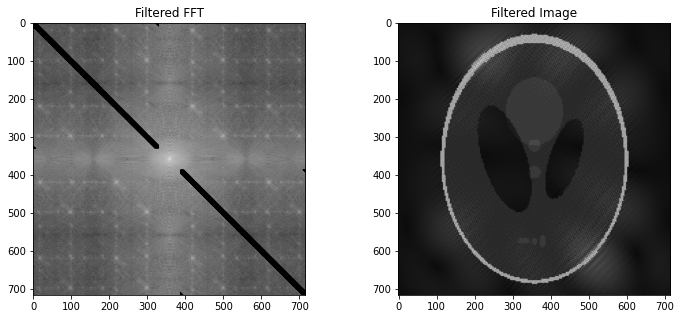

In [34]:
img_fft_filtered = img_fft.copy()
vmin, vmax = np.log(np.abs(img_fft) + 1e-14).min(), np.log(np.abs(img_fft) + 1e-14).max()
r = 330 # mask length
for i in range(10): # mask bandwidth
    # mask out the diagonal frequency -> corresponding to the striped noise
    img_fft_filtered[:r,:r].flat[i::r+1] *= 1e-6
    img_fft_filtered[-r:,-r:].flat[i::r+1]  *= 1e-6
    img_fft_filtered[:r,:r].flat[r-i::r+1] *= 1e-6
    img_fft_filtered[-r:,-r:].flat[r-i::r+1]  *= 1e-6
img_filtered = np.fft.ifft2(np.fft.ifftshift(img_fft_filtered)).real

plt.figure(figsize = (12, 5))
plt.subplot(1,2,1)
plt.imshow(np.log(np.abs(img_fft_filtered) + 1e-14), cmap = 'gray', vmin = vmin, vmax = vmax)
plt.title('Filtered FFT')
plt.subplot(1,2,2)
plt.imshow(img_filtered, cmap = 'gray')
plt.title('Filtered Image')
plt.show()